<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Gradient Descent

In [1]:
# Import the libraries we know we need
import numpy as np
import gc
import os
import matplotlib.pyplot as plt

from matplotlib.animation import ArtistAnimation
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
from IPython.display import Image, display, HTML

plt.style.use('bmh')

import warnings
warnings.filterwarnings("ignore")

## Simple Example
Let's start with a simple example

Our function: $f(x)=x^2$

Derivative: $f'(x)=2x$

In [2]:
# Main function
def f(x):
    return x**2

# Derivative of function
def f_prime(x):
    return 2 * x

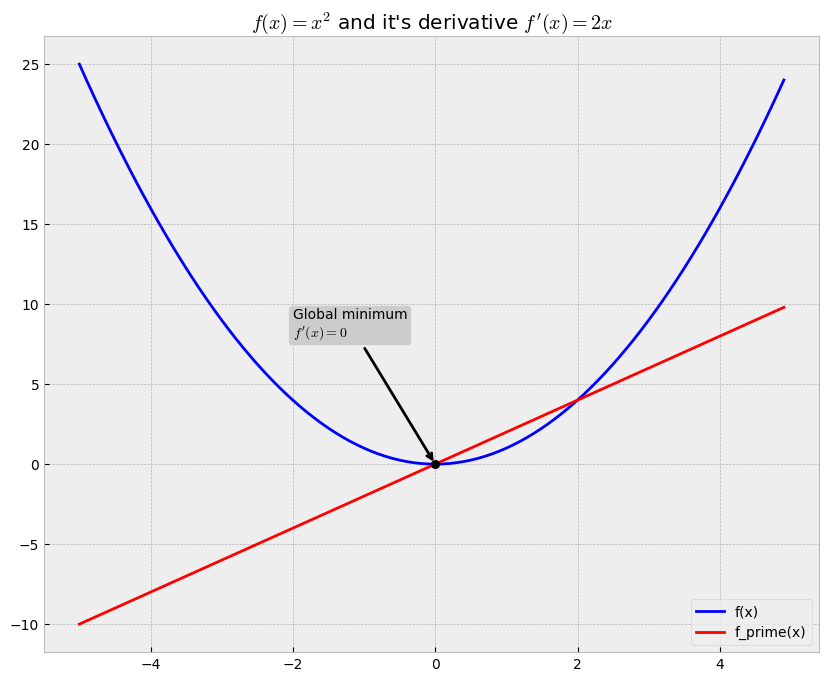

In [3]:
# Plot the function and it's derivative

fig, ax = plt.subplots(figsize = (10, 8))

# Domain of function
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x), color = 'b', linewidth = 2, label = 'f(x)') # Plot the main function
plt.plot(x, f_prime(x), color = 'r', label = "f_prime(x)") # Plot the derivative of function
plt.scatter(0, 0, color = 'k', zorder = 2.5) # Global minimum of the function

# Annotations block
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle = '->', color = 'k', linewidth = 2)
ax.annotate('Global minimum\n$f\'(x)=0$', xy = (0, 0), xytext = (-2, 8), bbox = bbox_args, arrowprops=arrow_args)

plt.title("$f(x)=x^2$ and it's derivative $f'(x)=2x$")
plt.legend()
plt.show()

The plot above shows our function and its derivative.  Because our function is convex, when the derivative of our function is equal to 0 we are at the global minimum of our function.

To use gradient descent to find the global minimum, we apply the followng steps:
1. Define a starting x coordinate, from which we want to descend to the local/global minimum
2. Calculate the derivative at this point
3. Subtract the value of the derivative at this point from the starting value. To prevent divergence we need to multiply the derivative by small number "eta", or the learning rate.
4. Repeat from step 2

So the main gradient descent formula can be written as: $x_{next} = x_{start} - \eta * derivative$

MovieWriter imagemagic unavailable; using Pillow instead.


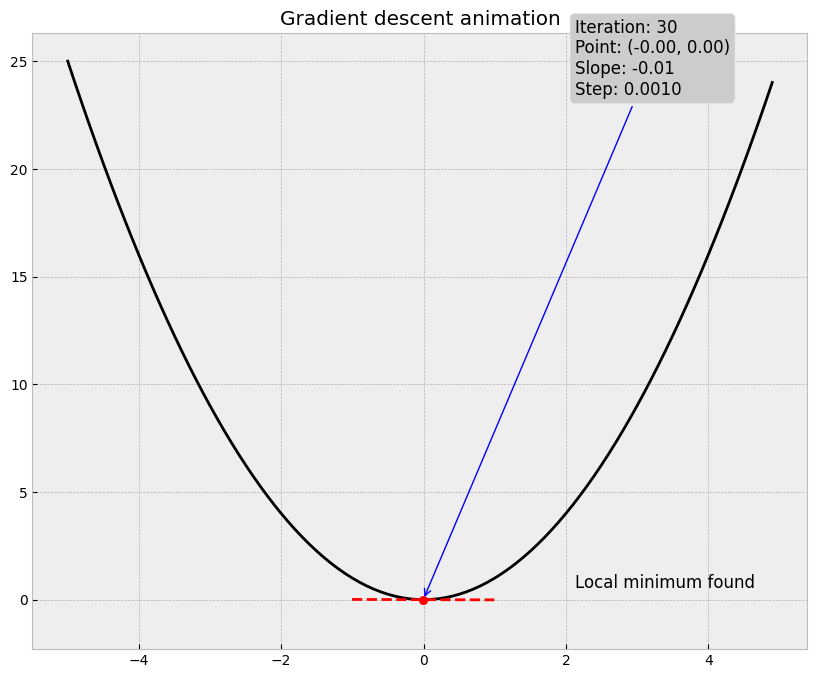

In [14]:
def gradient_descent(function, derivative, start_x = -4, x_domain = (-5, 5, 0.1), iterations = 1000, lr = 0.1, precision = 0.001, 
                     figsize = (10, 8), name = 'anim.gif', fps = 5):
    '''
    Creates an animation of gradient descent from a point to the closest local minimum.
    
    Params:
        function - described function, must be passed as function
        derivative - derivative of "function", must be passed as function
        start_x - starting X coordinate of point
        x_range - domain of function as tuple - (left_bound, right_bound, step)
        iterations - maximum number of iteration before stop
        lr - learning rate
        precision - desired precision of result, if step of gradient descent will be smalle than precision, then algorithm will stop
        figsize - size of a plot
        name - name of animation to save
        fps - fps of animation
    '''
    
    images = []    
    fig, ax = plt.subplots(figsize = figsize)
    x = np.arange(*x_domain)
    px = float(start_x) # Starting x coordinate

    # Function plot
    f = plt.plot(x, function(x), color = 'k')

    for frame in range(iterations):
        old_px = px # Saving old px value to calculate step

        # Plot point to track
        py = function(px) # Y coordinate of point    
        point = plt.scatter(px, py, color = 'r', zorder = 2.5)

        # Plot tangent line to the graph at (px, py) point
        slope = derivative(px)
        y_intercept = py - slope * px
        tx = np.arange(px - 1, px + 2, 2) # X coordinates of tangent line
        ty = slope * tx + y_intercept # Y coordinates of tangent line
        tangent = plt.plot(tx, ty, 'r--')    

        # Calculate new value of px
        px = px - lr * slope
        step = abs(old_px - px)

        # Plot text info
        bbox_args = dict(boxstyle="round", fc="0.8")
        arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
        text = f'Iteration: {frame}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {step:.4f}'
        text = ax.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 12)

        plt.title('Gradient descent animation')    
        
        # Stopping algorithm if desired precision have been met
        if step <= precision:
            text2 = plt.text(0.7, 0.1, 'Local minimum found', fontsize = 12, transform = ax.transAxes)
            images.append([f[0], tangent[0], point, text, text2])
            break

        images.append([f[0], tangent[0], point, text])

    anim = ArtistAnimation(fig, images) 
    anim.save(name, writer = 'imagemagic', fps = fps)

# Creating animation
gradient_descent(f, f_prime, start_x = -4, lr = 0.1, name = 'classic.gif')

In [15]:
# Run the animation
HTML('<img src="./classic.gif" />')

## Sin(x) function
Let's try this on $f(x)=sin(x)$ with random starting point.

MovieWriter imagemagic unavailable; using Pillow instead.


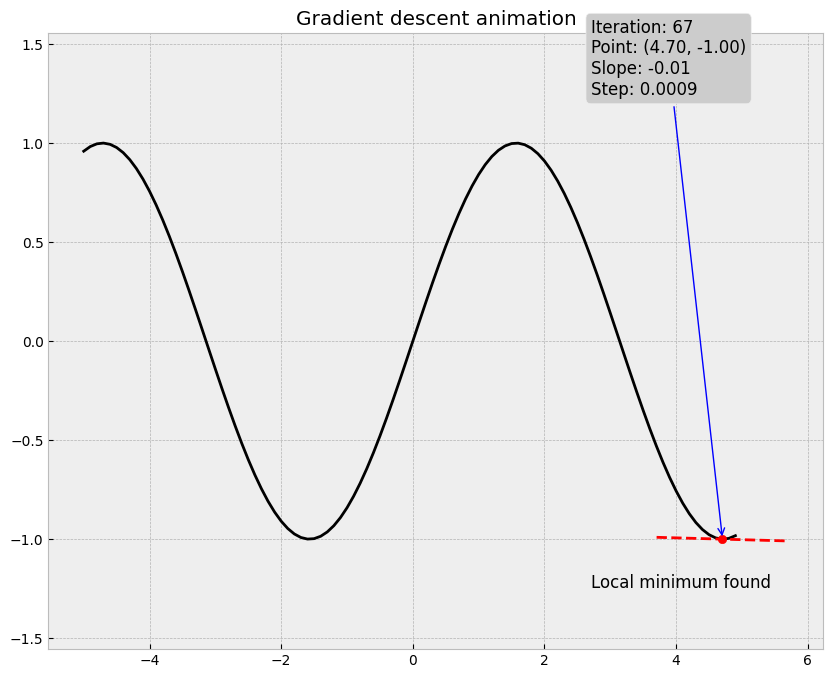

In [22]:
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

gradient_descent(f, f_prime, start_x = np.random.uniform(-5, 5), name = 'sin.gif')

In [17]:
HTML('<img src="./sin.gif" />')

## Gradient descent on a multivariable function
Now let's take something more interesting - a multivariable function with two input variables.

$f(x, y)=sin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)$

As in the previous example, to perform gradient descent we need to calculate the derivative.  However, because we have more than one variable in our function, we need to calculate the partial derivatives with respect to both X and Y:
1. Partial derivative with respect to X:

$\frac{\partial f}{\partial x}=xcos(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)-2sin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)sin(2x+1-e^y)$

2. Partial derivative with respect to Y:

$\frac{\partial f}{\partial y}=-\frac{1}{2}ycos(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)+e^ysin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)sin(2x+1-e^y)$

These partial derivatives together form the gradient - the vector which shows the direction of steepest ascent of the function:

$\nabla f(x, y)=\begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}$

If we add a negative sign to that vector it will show us the direction of steepest descent.  This is what we use for gradient descent.

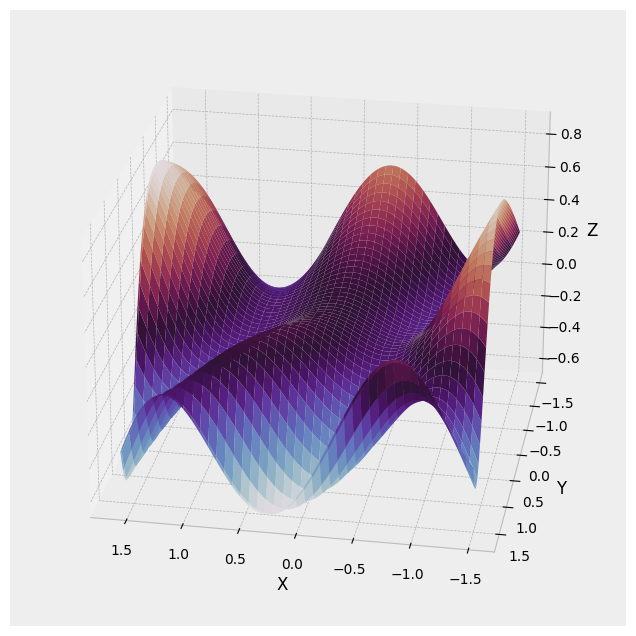

In [21]:
# Defining main function and partial derivatives
def f(x, y):
    return np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y)

def partial_x(x, y):
    return x * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) - 2 * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)

def partial_y(x, y):
    return -1/2 * y * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) + np.e**y * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)


# Domain of function
x = np.arange(-1.5, 1.6, 0.01)
y = np.arange(-1.5, 1.6, 0.01)

# Creating (x, y) pairs and calculating Z coordiante
X, Y = meshgrid(x, y)
Z = f(X, Y)

# Plot function
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'twilight')
ax.view_init(25, 100)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

plt.show()

MovieWriter imagemagic unavailable; using Pillow instead.


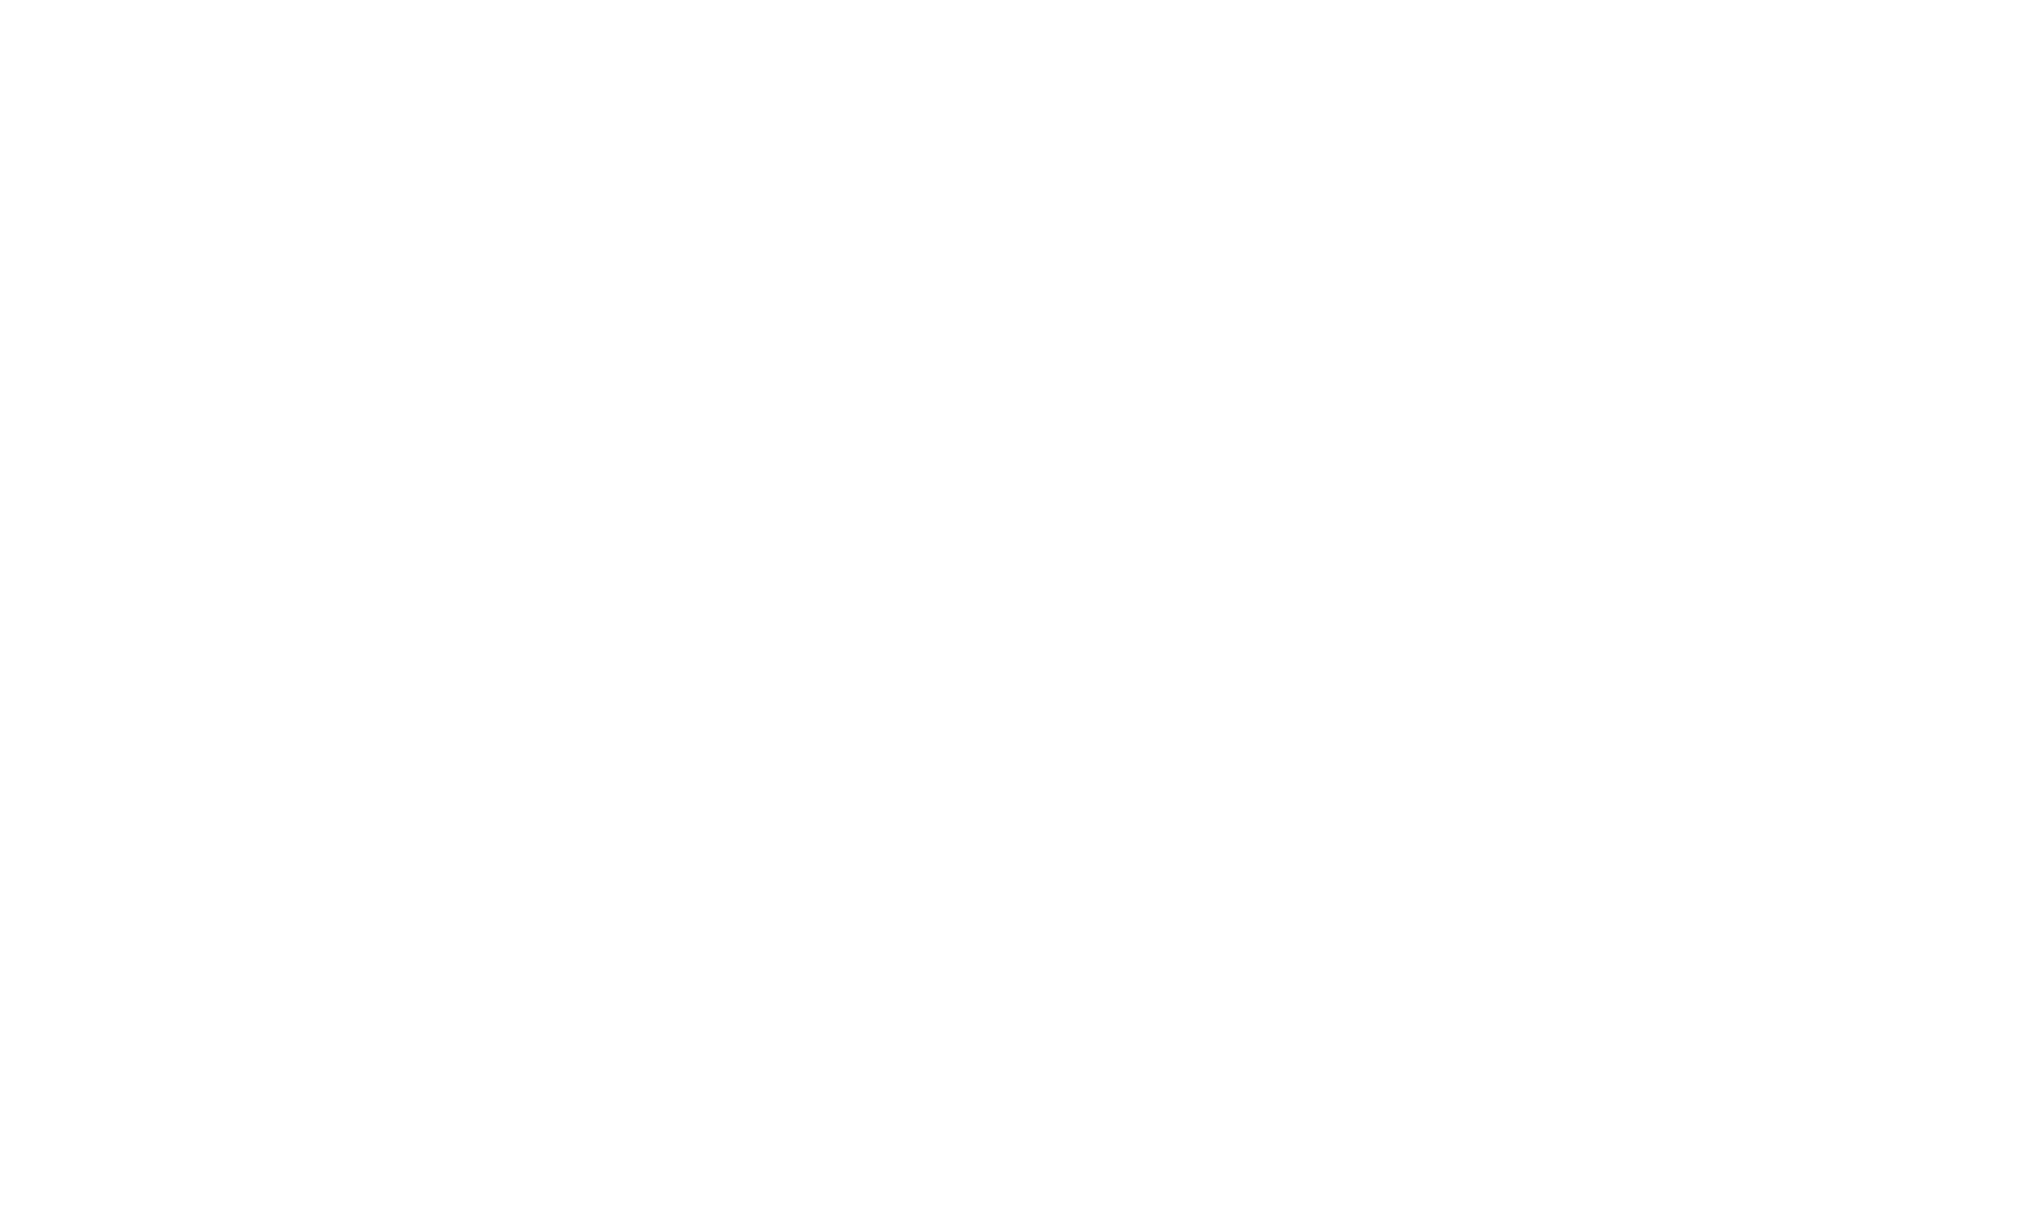

In [19]:
# List to store images
images = []

# Function domain
x = np.arange(-1.5, 1.6, 0.01)
y = np.arange(-1.5, 1.6, 0.01)

# Creating (x, y) pairs and calculating Z coordiante
X, Y = meshgrid(x, y)
Z = f(X, Y)

iterations = 200 # number of iterations before algorithm will stop
lr = 0.01 # Learning rate

# Plot main function
fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'twilight', alpha = 0.9)
ax.view_init(45, 45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Starting coordinates of points
px = np.array([-0.25, 0, 1.25, -1.25, 0, 0.25, -1])
py = np.array([-1.25, -1.25, 0.25, 0.25, 0, 0.75, -1])

# Main algorithm cycle
for frame in range(iterations):
    # Calculating Z-coordinate for each point
    pz = [f(p[0], p[1]) for p in zip(px, py)]
    
    # Plot points
    points = ax.plot(px, py, pz, marker = '.', linestyle = 'None', color = 'r', markersize = 10, zorder = 2.5)
    
    # Calculating partial derivatives for each point
    gx = np.array([partial_x(p[0], p[1]) for p in zip(px, py)])
    gy = np.array([partial_y(p[0], p[1]) for p in zip(px, py)])
    
    # Subtract partial derivatives from x and y coordinates
    px = px - lr * gx
    py = py - lr * gy
    
    images.append([ax, points[0]])

anim = ArtistAnimation(fig, images) 
anim.save('multivar.gif', writer = 'imagemagic', fps = 20)

In [20]:
HTML('<img src="./multivar.gif" />')